# Preprocessing

Segun hemos concluido en nuestro estudio de la base de datos ( EDA ) hacemos unas modificaciones en el Data Frame.

- Eliminamos 2 variables categoricas de segmentacion. Está carterizado y cliente BP.
- Variable Edad. Eliminaremos a los clientes entre los rangos de edad 0-25 y 90 y superiores.
- Fondos de Inversion y Planes de Pension son convertidas en variables booleanas. (0-1) Tiene o no tiene.  

Adcionalmente trabajamos con:

- Label Encoder - Convertir las variables categoricas en numero
- Outliers - Revision de posibles Ouliers
- Normalizacion - Llevar todas las variables a una escala comun
- PCA Posible simplificacion de variables reduciendo dimesionalidad a la base de datos


In [65]:
import pandas as pd
import numpy as np

In [66]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

In [74]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

### LABEL ENCODER

Basandonos en EDA realizado ,dentro de variables de segmentacion mantenemos solo 5 las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [75]:
variables_segmentacion =['seg_valor','camino_digital','seg_recorrido','marca_ccte','marca_bp']


In [76]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [77]:
df['marca_bp'].value_counts()

NO    325275
SI    126099
Name: marca_bp, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [79]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [80]:
# Confirmamos que la transformacion se ha realizado correctamente.  
df['marca_bp'].value_counts()

0    325275
1    126099
Name: marca_bp, dtype: int64

## Adaptacion de Variables

In [11]:
# Eliminamos clientes de 0 a 24 años y de mas de 90 años
inf25 = df[df['edad'] < 25].index
# Eliminamos las filas de la base de datos
df.drop(inf25 , inplace=True)

In [12]:
# Eliminamos clientes de mas de 90 años
sup90 = df[df['edad'] > 90].index
# Eliminamos las filas de la base de datos
df.drop(sup90 , inplace=True)

In [13]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

### Estudio Outliers Edad

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'. 

- Variable Captacion. Son valores reales. No queremos eliminar outliers. Solamente modificamos los negativos y les damos valor 0 Euros.
- Fondos de inversion y planes de pension. Transformaremos a valor booleano 0-1 "Tiene no Tiene.
- Financiacion es una variable que por su naturaleza no queremos modificar.

- __Variable edad__. Es la unica que puede tener ouliers reales.  Hemos eliminado previamente clientes entre 0-25 años y superiores a 90 años por lo que probablemente los Outlier esten ya trabajados. 

__Variable EDAD__

Hacemos la visualizacion con un histograma y un BoxPlot. Con este ultimo confirmamos que no tenemos Outliers

In [14]:
import matplotlib.pyplot as plt
import pylab as pl

<AxesSubplot:>

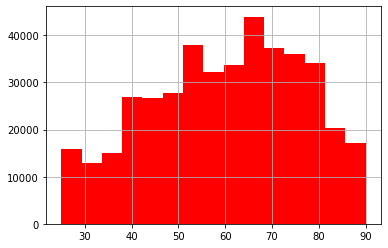

In [15]:
df['edad'].hist(color = 'r', bins = 15)

Boxplot edad


<function matplotlib.pyplot.show(close=None, block=None)>

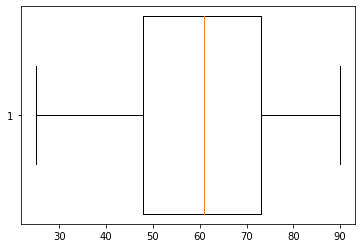

In [16]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   


In [17]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

In [18]:
# Transformamos variable Planes de Pension 0 No tiene 1 Si tiene
df['saldo_plp'] = df['saldo_plp'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_plp'], normalize = True)

0    0.888785
1    0.111215
Name: saldo_plp, dtype: float64

In [19]:
# Transformamos variable Fondos de Inversion 0 No tiene 1 Si tiene
df['saldo_ffii'] = df['saldo_ffii'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_ffii'], normalize = True)

0    0.859183
1    0.140817
Name: saldo_ffii, dtype: float64

In [20]:
# Variable Captacion. 
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos  = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 8828
Porcentaje_Clientes_con_saldos_negativos:  0.021129120274190307


In [21]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [22]:
df['saldo_captacion'].describe()

count    4.178120e+05
mean     5.194882e+04
std      8.914284e+04
min      0.000000e+00
25%      2.189145e+03
50%      1.787874e+04
75%      6.811098e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [23]:
# Df sin unidades de negocio
df=df[['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
      'lp_dom_ingresos','lp_rbos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc','lp_seg_hogar']]

In [24]:
df.sample(5)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_rbos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
151073,12160.73,266.58,58.0,2,0,0,1,1,2,0,0,0,0,0,1,0,0,0
400560,7912.21,380.24,78.0,2,0,0,1,1,4,0,0,0,0,0,1,1,0,0
385412,30776.34,0.00,88.0,0,1,0,0,1,3,2,0,0,0,0,1,0,0,0
45611,270983.46,0.00,43.0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1
167879,25947.18,0.00,43.0,0,0,0,0,1,4,0,2,0,0,0,1,0,0,0


In [25]:
pwd

'C:\\Users\\manue\\TFM\\Financial-Product-Sales-Forecast-Model\\Preprocessing'

In [26]:
# Guardamos cvs
df.to_csv('df_encoded.csv', index = False)

### NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
df_normalized = scaler.fit_transform(df)

In [30]:
columnas = df.columns

In [31]:
df_normalized = pd.DataFrame(df_normalized, columns=columnas)

In [32]:
df_normalized.head(3)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_rbos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
0,0.251050,0.001689,0.766667,0.0,1.0,1.0,1.0,1.0,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.215915,0.001689,0.900000,0.0,1.0,0.0,0.0,1.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.215915,0.001689,0.833333,0.0,1.0,0.0,0.0,1.0,0.75,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# save to csv
df_normalized.to_csv('df_normalized.csv', index = False)

In [34]:
df_normalized.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'lp_rbos',
       'camino_digital', 'seg_recorrido', 'marca_ccte', 'lp_seg_vida',
       'lp_seg_auto', 'marca_bp', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc',
       'lp_seg_hogar'],
      dtype='object')

### PCA 

No lo consideramos necesario. Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 17 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.

In [35]:
from sklearn.decomposition import PCA

In [36]:
df_sin_target = df_normalized.drop(['lp_seg_hogar'], axis = 1)

In [37]:
pca = PCA(15) # n =  ponemos como numero de pcas 15
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [38]:
pca.components_[14]

array([ 1.11824554e-03,  2.01649349e-03, -5.95476203e-03,  2.09566153e-02,
       -8.35933148e-03, -2.44076842e-02, -1.33005712e-02, -2.62559100e-03,
        1.26372849e-03,  4.32207925e-03,  4.54410735e-06, -2.66986552e-03,
        9.98854731e-01,  4.21535182e-03,  2.38578504e-03, -1.08234884e-02,
       -2.81397054e-02])

In [39]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('saldo_captacion', -1.0001994539457362),
 ('saldo_financiacion', 0.07868380926519651),
 ('edad', 0.3879969081171438),
 ('seg_valor', 0.4507084157425182),
 ('saldo_ffii', 0.35391518296195745),
 ('saldo_plp', 0.5558252379004145),
 ('lp_dom_ingresos', 0.9965997265712386),
 ('lp_rbos', -0.19332282166624523),
 ('camino_digital', -0.11666327447013039),
 ('seg_recorrido', -0.28133138819151104),
 ('marca_ccte', -0.09974425176644718),
 ('lp_seg_vida', -0.32760118612421),
 ('lp_seg_auto', 0.13144175975214176),
 ('marca_bp', -0.0790746208904541),
 ('lp_tjta_cto', -0.06355582872580078)]

In [40]:
print("shape X_pca", df_transforming.shape)
exp = pca.explained_variance_ratio_
print(exp)
print('sum:',sum(exp[0:15]))
#Vemos que con los 15 componentes tenemos el 99% de varianza explicada. Casi mismo numero de variables que sin PCA.

shape X_pca (417812, 15)
[0.23706238 0.17414257 0.10868627 0.07626315 0.06834774 0.05713
 0.05346763 0.04287605 0.041858   0.03833963 0.03725154 0.03119465
 0.01490429 0.01060127 0.00767722]
sum: 0.9998023778195608


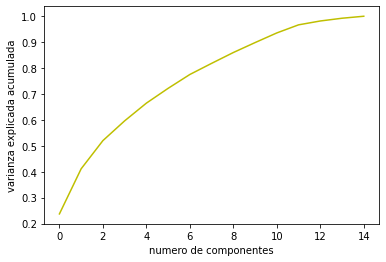

In [41]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'y')
plt.xlabel('numero de componentes')
plt.ylabel('varianza explicada acumulada')
plt.show() 

In [42]:
# Damos un nombre a cada columna del DF una vez realizado el PCA.
df_pca = pd.DataFrame (data = df_transforming, columns = ['var_pca_1','var_pca_2','var_pca_3',
                                                          'var_pca_4','var_pca_5','var_pca_6',
                                                          'var_pca_7','var_pca_8','var_pca_9',
                                                          'var_pca_10','var_pca_11','var_pca_12',
                                                          'var_pca_13','var_pca_14','var_pca_15'])                          
                                                          

In [43]:
# Unimos nuestro Target al DF con PCA realizado.
df_normalized_pca = pd.concat ([df_pca, df_normalized [['lp_seg_hogar']]], axis = 1)

In [44]:
df_normalized_pca.to_csv('df_normalized_pca.csv', index = False)